# Wine Quality Prediction and Model Evaluation 

## Importing modules and dataset

In [2]:
import dataloader as dl # module for loading and pre-processing the data
import models_eval as mev # module for model training and testing
d = dl.load_dataset()
d

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  recommend  
0         8.8        6      False  
1         9.5        6      False  
2        10.1        6      False  
3         9.9        6      False  
4         9.9        6      False  
...       ...      ...        ...  
4893     11.2        6      False  
4894      9.6        5      False  
4895      9.4        6      False  
4896     12.8        7       True  
4897     11.8        6      False  

[4898 rows x 13 columns]

## Visualizing the dataset

List of features in the dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']





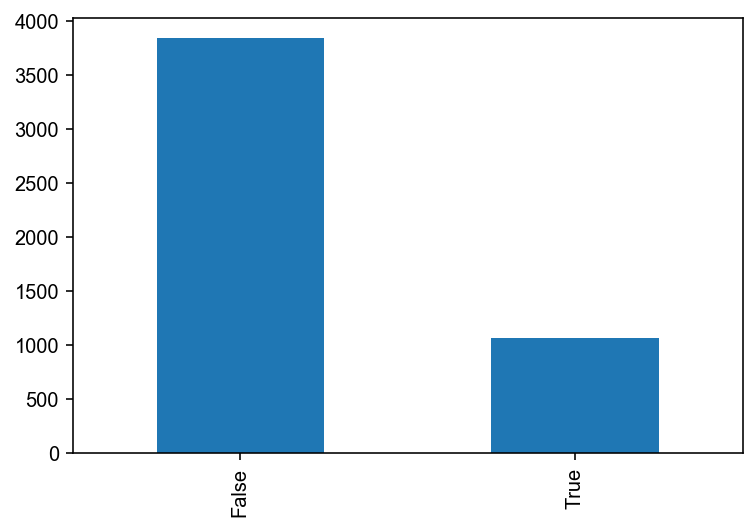

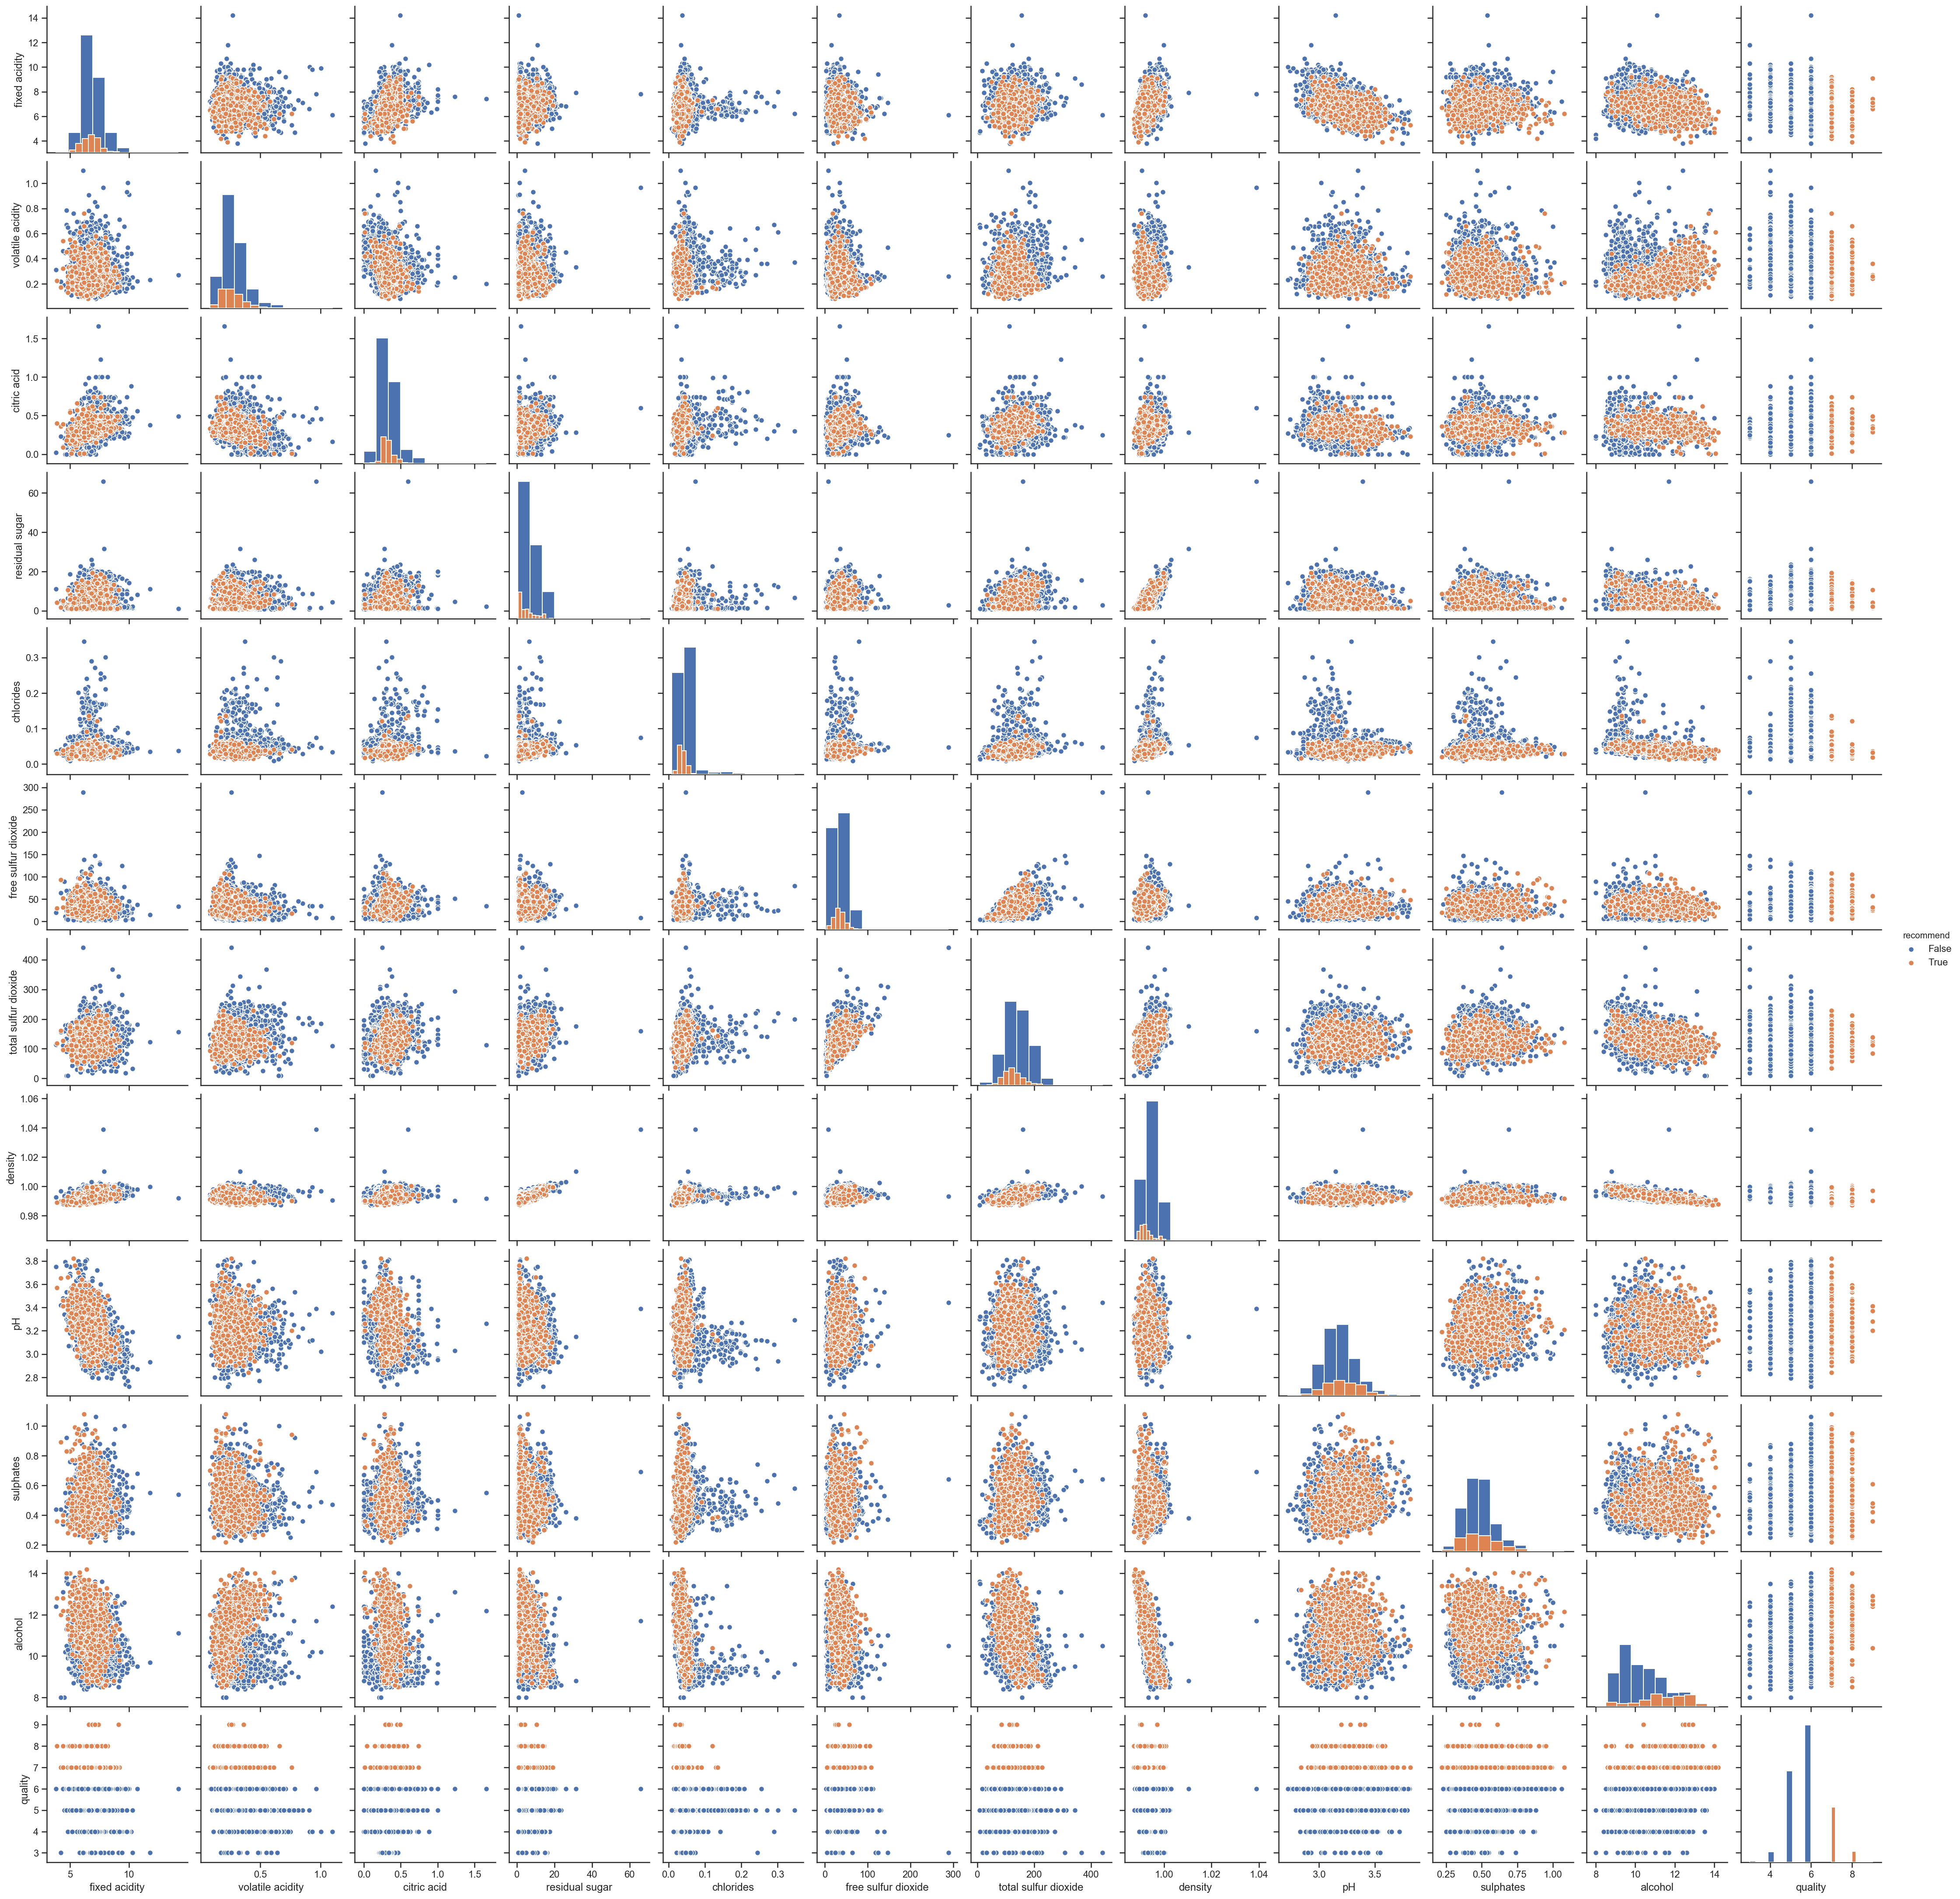

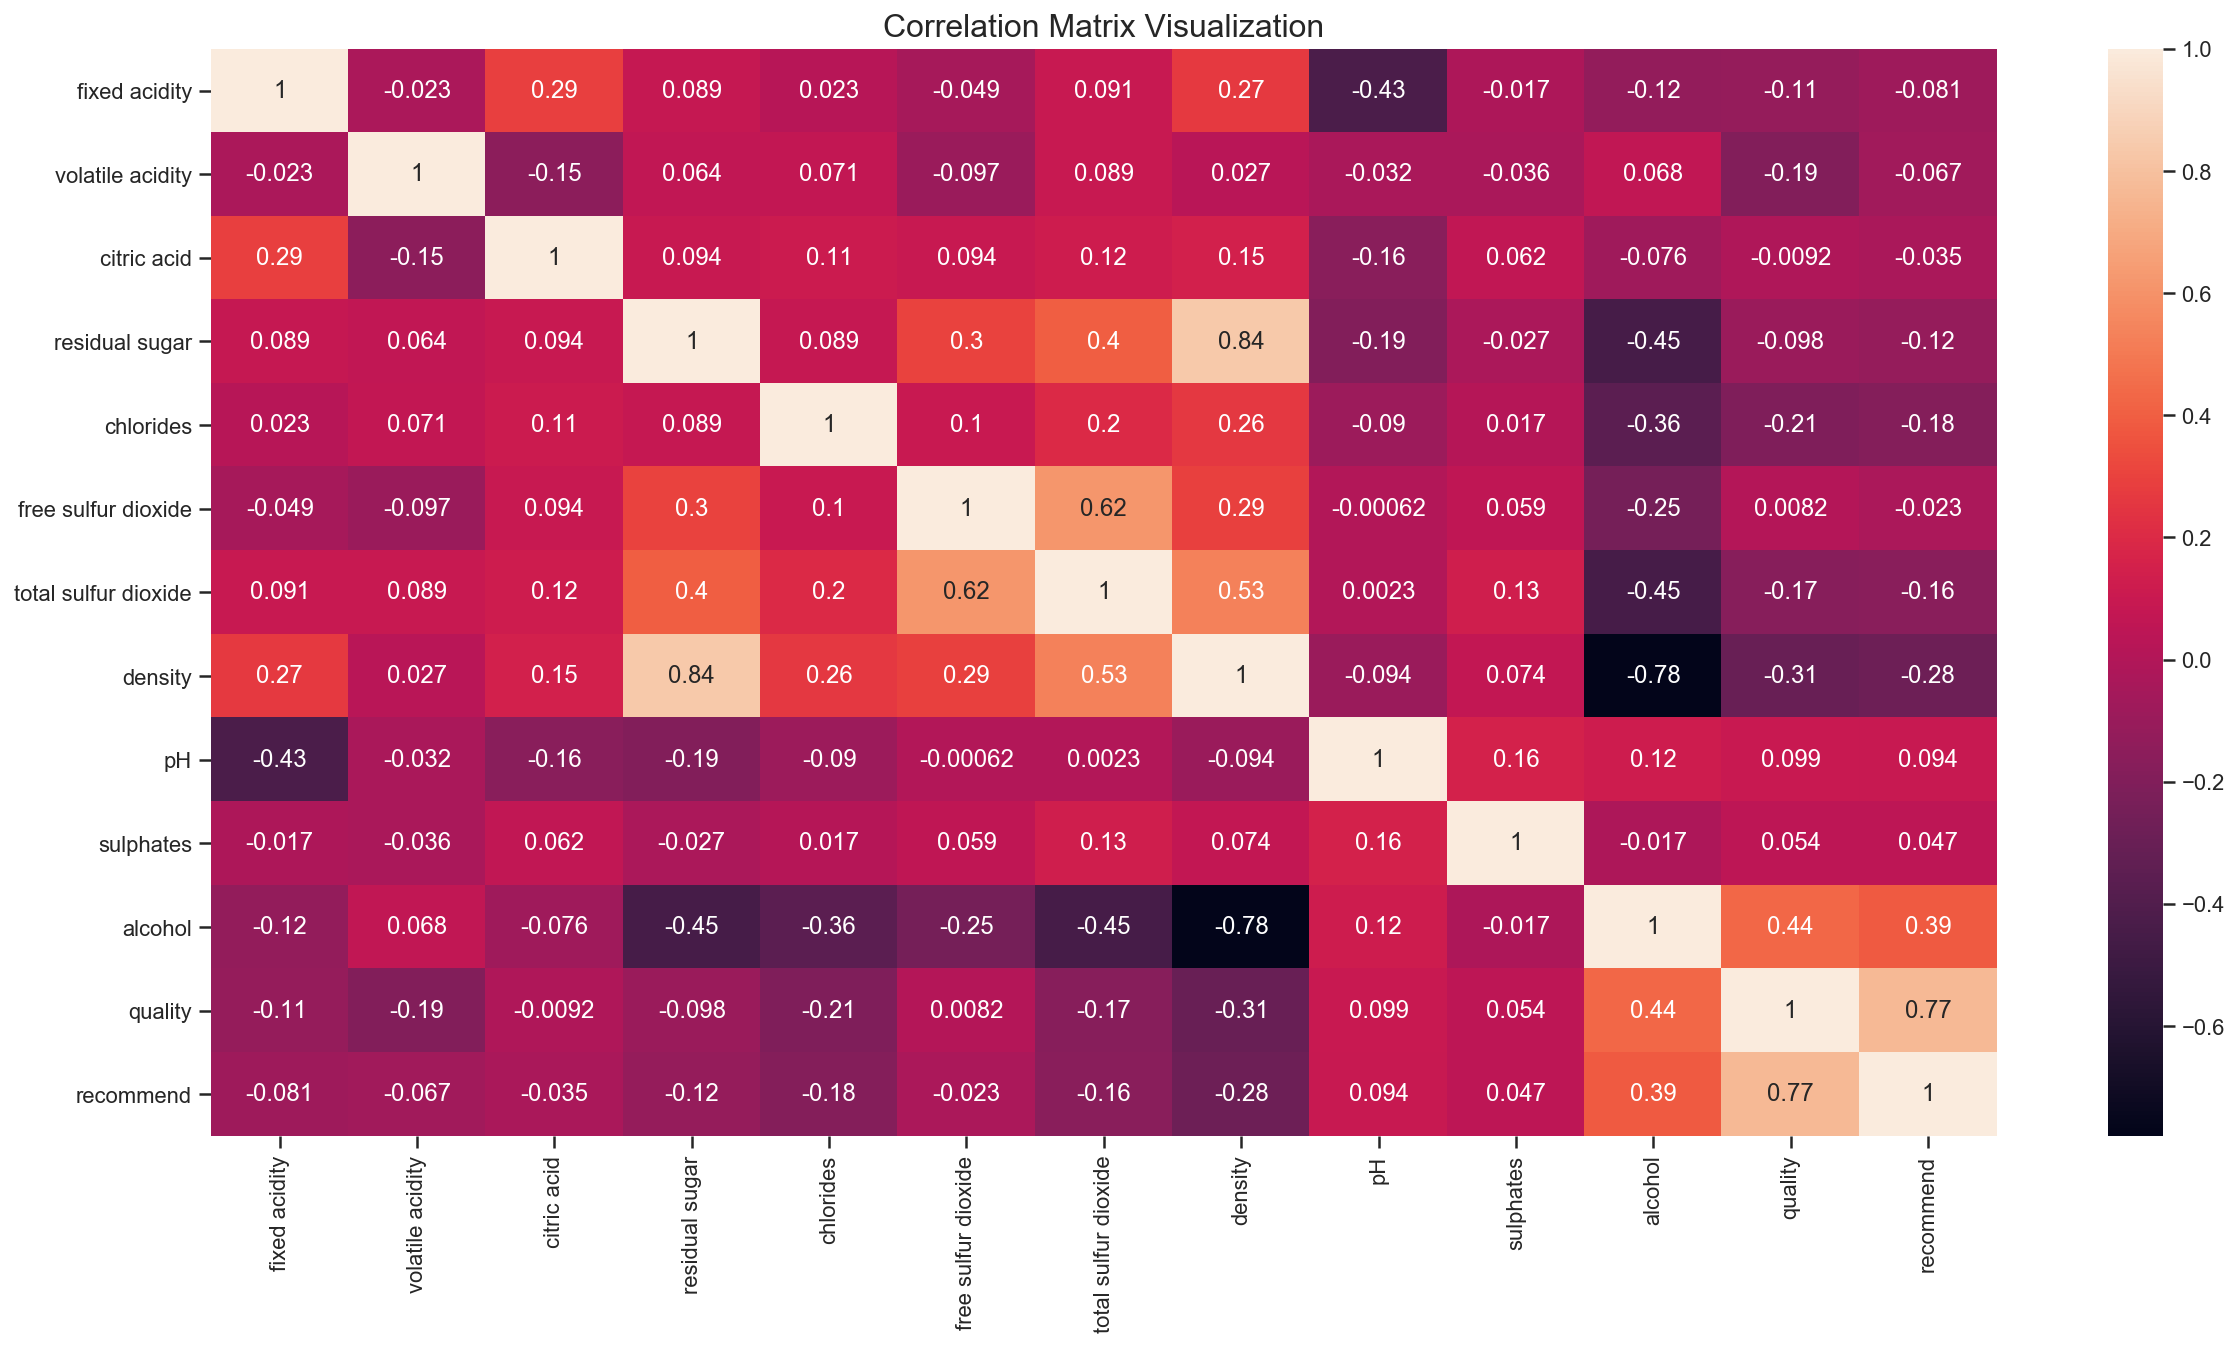

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
dl.visualize_data(d)

The distribution of both the target labels can be seen above in the bar graph, with higher False labels than the True labels for the 'recommend' column.

In the above pair-waise plot (orange marks -> recommended wine, blue marks -> not recommended wine), it can be seen that **'recommend' is a direct function of 'quality'** (recommend = True for quality >=7; False otherwise), so I will **exclude quality** from this model that predicts 'recommend'. I'll be using recommend to get a binary prediction. (A multi-class model may also be built to predict 'quality', ignoring 'recommend').

From the correlation matrix above (the last plot), any specific patterns or high correlation between any two features is not observed so as to take any special measures towards improving the acuracy of the model.

Please right click and view/open the image in a new tab if plot is not clear enough.

## Preprocessing and Splitting the dataset

In [4]:
x_train, x_test, y_train, y_test = dl.PreProcess_and_Split(d)

StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.4,
            train_size=None)


In [5]:
print(x_train.shape[0]) # Training set size
print(x_test.shape[0]) # Test set size

2938
1960


In [6]:
print(dl.pd.Series(y_train).value_counts(normalize=True)*100)
print(dl.pd.Series(y_test).value_counts(normalize=True)*100)

False    78.352621
True     21.647379
Name: recommend, dtype: float64
False    78.367347
True     21.632653
Name: recommend, dtype: float64


Using **stratified splitting**, I have split the data to maintain similar proportion of recommended and not recommended wine data in both training and testing sets.

## Training the classifier models on training set
</br>

### Model-1: Logisitc Regression

In [7]:
y_pred1 = mev.LogReg(x_train, x_test, y_train) #predicted target values
y_pred1

array([False, False,  True, ..., False, False, False])

### Model-2: KNN

In [8]:
y_pred2 = mev.KNN(x_train, x_test, y_train, y_test) #predicted target values
y_pred2

array([False, False, False, ..., False, False, False])

### Model-3: Naive Bayes

In [9]:
y_pred3 = mev.NaiveBayes(x_train, x_test, y_train) #predicted target values
y_pred3

array([False, False,  True, ..., False,  True,  True])

### Model-4: Kernal SVM

In [10]:
y_pred4 = mev.Ksvm(x_train, x_test, y_train) #predicted target values
y_pred4

array([False, False,  True, ..., False,  True, False])

### Model-5: Random Forest Classification

In [11]:
y_pred5 = mev.RFC(x_train, x_test, y_train) #predicted target values
y_pred5

array([False, False,  True, ..., False, False, False])

## Evaluating the performance

### Model-1: Logisitc Regression Performance Evaluation

In [12]:
mev.Performance_Eval(y_test, y_pred1)

Confusion matrix:
[[1456   80]
 [ 291  133]]



Accuracy Score:
0.8107142857142857 %



Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.95      0.89      1536
        True       0.62      0.31      0.42       424

    accuracy                           0.81      1960
   macro avg       0.73      0.63      0.65      1960
weighted avg       0.79      0.81      0.79      1960



It can be seen from the confusion matrix above that type-I errors are 80 and type-II erros are 291 in number out of 1960 total number of records in the test data.
<br/>
<br/>
This model has an **Accuracy of 81.07%**.
<br/>
The **individual class precision** is: 0.83 for not recommended wine and 0.62 for recommended wine,
<br/>
and the **recall value** is: 0.95 for not recommended wine and 0.31 for recommended wine,
<br/>
giving a **f1-score value** of:  0.89 for not recommended wine and 0.42 for recommended wine.
<br/>
The **macro averages** are:- Precision : 0.73, Recall: 0.63, f1-score: 0.65.
<br/>
The **weighted averages** are:- Precision : 0.79, Recall: 0.81, f1-score: 0.79.
<br/>


### Model-2: KNN Performance Evaluation

In [13]:
mev.Performance_Eval(y_test, y_pred2)

Confusion matrix:
[[1477   59]
 [ 241  183]]



Accuracy Score:
0.8469387755102041 %



Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.96      0.91      1536
        True       0.76      0.43      0.55       424

    accuracy                           0.85      1960
   macro avg       0.81      0.70      0.73      1960
weighted avg       0.84      0.85      0.83      1960



It can be seen from the confusion matrix above that type-I errors are 59 and type-II erros are 241 in number out of 1960 total number of records in the data.
<br/>
<br/>
This model has an **Accuracy of 84.69%**.
<br/>
The **individual class precision** is: 0.86 for not recommended wine and 0.76 for recommended wine,
<br/>
and the **recall value** is: 0.96 for not recommended wine and 0.43 for recommended wine,
<br/>
giving a **f1-score value** of:  0.91 for not recommended wine and 0.55 for recommended wine.
<br/>
The **macro averages** are:- Precision : 0.81, Recall: 0.70, f1-score: 0.73.
<br/>
The **weighted averages** are:- Precision : 0.84, Recall: 0.85, f1-score: 0.83.
<br/>


### Model-3: Naive Bayes Performance Evaluation

In [14]:
mev.Performance_Eval(y_test, y_pred3)

Confusion matrix:
[[1138  398]
 [ 112  312]]



Accuracy Score:
0.7397959183673469 %



Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.74      0.82      1536
        True       0.44      0.74      0.55       424

    accuracy                           0.74      1960
   macro avg       0.67      0.74      0.68      1960
weighted avg       0.81      0.74      0.76      1960



It can be seen from the confusion matrix above that type-I errors are 398 and type-II erros are 112 in number out of 1960 total number of records in the data.
<br/>
<br/>
This model has an **Accuracy of 73.97%**.
<br/>
The **individual class precision** is: 0.91 for not recommended wine and 0.44 for recommended wine,
<br/>
and the **recall value** is: 0.74 for not recommended wine and 0.74 for recommended wine,
<br/>
giving a **f1-score value** of:  0.82 for not recommended wine and 0.55 for recommended wine.
<br/>
The **macro averages** are:- Precision : 0.67, Recall: 0.74, f1-score: 0.68.
<br/>
The **weighted averages** are:- Precision : 0.81, Recall: 0.74, f1-score: 0.76.
<br/>


### Model-4: Kernel SVM Performance Evaluation

In [15]:
mev.Performance_Eval(y_test, y_pred4)

Confusion matrix:
[[1485   51]
 [ 269  155]]



Accuracy Score:
0.8367346938775511 %



Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.90      1536
        True       0.75      0.37      0.49       424

    accuracy                           0.84      1960
   macro avg       0.80      0.67      0.70      1960
weighted avg       0.83      0.84      0.81      1960



It can be seen from the confusion matrix above that type-I errors are 51 and type-II erros are 269 in number out of 1960 total number of records in the data.
<br/>
<br/>
This model has an **Accuracy of 83.67%**.
<br/>
The **individual class precision** is: 0.85 for not recommended wine and 0.75 for recommended wine,
<br/>
and the **recall value** is: 0.97 for not recommended wine and 0.37 for recommended wine,
<br/>
giving a **f1-score value** of:  0.90 for not recommended wine and 0.49 for recommended wine.
<br/>
The **macro averages** are:- Precision : 0.80, Recall: 0.67, f1-score: 0.70.
<br/>
The **weighted averages** are:- Precision : 0.83, Recall: 0.84, f1-score: 0.81.
<br/>


### Model-5: Random Forest classification

In [16]:
mev.Performance_Eval(y_test, y_pred5)

Confusion matrix:
[[1477   59]
 [ 162  262]]



Accuracy Score:
0.8872448979591837 %



Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93      1536
        True       0.82      0.62      0.70       424

    accuracy                           0.89      1960
   macro avg       0.86      0.79      0.82      1960
weighted avg       0.88      0.89      0.88      1960



It can be seen from the confusion matrix above that type-I errors are 59 and type-II erros are 162 in number out of 1960 total number of records in the data.
<br/>
<br/>
This model has an **Accuracy of 88.72%**.
<br/>
The **individual class precision** is: 0.90 for not recommended wine and 0.82 for recommended wine,
<br/>
and the **recall value** is: 0.96 for not recommended wine and 0.62 for recommended wine,
<br/>
giving a **f1-score value** of:  0.93 for not recommended wine and 0.70 for recommended wine.
<br/>
The **macro averages** are:- Precision : 0.86, Recall: 0.79, f1-score: 0.82.
<br/>
The **weighted averages** are:- Precision : 0.88, Recall: 0.89, f1-score: 0.88.
<br/>


#### Hyperparameter Tuning for Random Forest Classifier

For above RFC model, I have used the value of hyperparameter 'n_estimators' = 73 (for RandomForestClassifier inside the models_eval module) for this dataset with the help of following analysis:

Text(0, 0.5, 'Testing Accuracy')

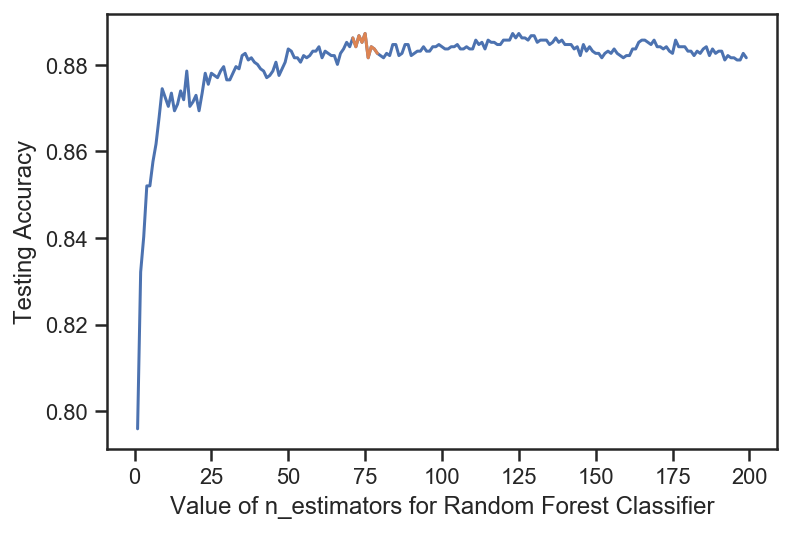

In [17]:
scores =[]
for k in range(1, 200):
    rfc = mev.RandomForestClassifier(n_estimators=k, criterion='entropy', random_state=0)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(mev.accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy

plt.plot(range(1, 200), scores)
plt.plot(range(71, 80), scores[70:79])
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

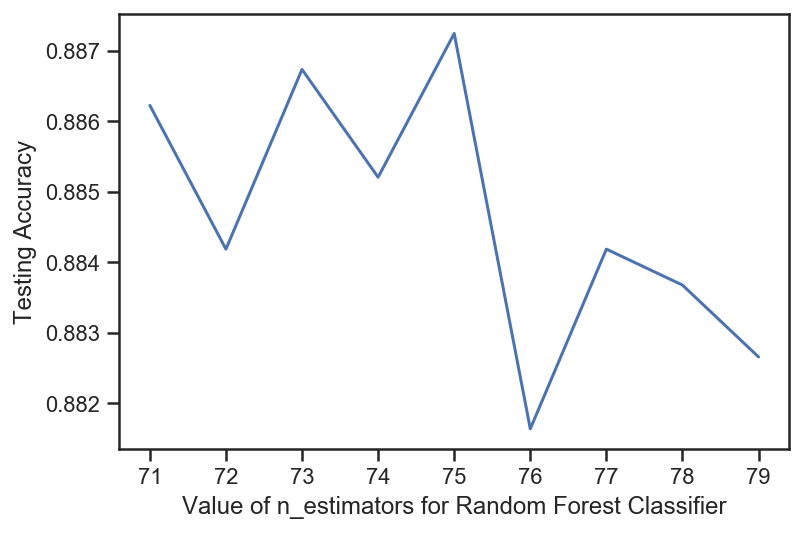

In [18]:
plt.plot(range(71, 80), scores[70:79])
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

For this purpose, a list of accuracy scores can be calculated and stored for a range of `n_estimators` within the `mev.RFC()` function. Then, `max()` function can be used on the list to determine the highest accuracy score and using `index()` method, suitable value of `n_esimators` can be determined.
<br>
I have avoided doing this while defining `mev.RFC()` in the module to reduce run-time, instead visualized the relation here and directly used the appropriate value of `n_estimators` in `mev.RFC()`.
<br>
Also, we may just select a high enough value for `n_estimators`, say above 50, as can be seen in the above plots, which will give a varying accuracy score roughly above 87%, which is still better than other models used here.

## Conclusion

Here we can see that Random Forest Classifier gives the best accuracy of 88.72% with this dataset, followed by KNN classifier with 84.69% accuracy score, without Undersampling. 
<br>
Also, it observed that due to higher number of 'False' labels in the dataset, the models give a high proprtion false negatives, which may be affecting the accuracy.